In [1]:
# Import all the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

import category_encoders as ce
from category_encoders import TargetEncoder, CatBoostEncoder, LeaveOneOutEncoder

%matplotlib inline 

# <font color='red'> 1) Dataset Preprocessing and Exploration </font>


In [2]:
spotify_data = pd.read_csv("dataset.csv") # Import the dataset 
spotify_data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


There are **114'000** rows and **21** columns. Let's explore the dataset.

In [3]:
spotify_data.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
spotify_data[spotify_data.isnull().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


There are only **3 NaN values**, that belong to the same observation (row n° 65900). Since it doesn't have neither the **'track_name'** nor **'artist'** value, I'm just going to drop the row.

In [5]:
spotify_data = spotify_data.drop(columns='Unnamed: 0', axis=1).dropna() # Remove 'Unnamed: 0' column and NaN values

I've also dropped the **'Unnamed: 0'** column, which is redundant.

In [6]:
# Some statistics about the dataset (just numerical variables)

spotify_data.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
popularity,113999.0,33.239,22.305,0.000,17.000,35.000,50.000,100.000
duration_ms,113999.0,228031.153,107296.058,8586.000,174066.000,212906.000,261506.000,5237295.000
danceability,113999.0,0.567,0.174,0.000,0.456,0.580,0.695,0.985
energy,113999.0,0.641,0.252,0.000,0.472,0.685,0.854,1.000
key,113999.0,5.309,3.560,0.000,2.000,5.000,8.000,11.000
loudness,113999.0,-8.259,5.029,-49.531,-10.013,-7.004,-5.003,4.532
mode,113999.0,0.638,0.481,0.000,0.000,1.000,1.000,1.000
speechiness,113999.0,0.085,0.106,0.000,0.036,0.049,0.084,0.965
acousticness,113999.0,0.315,0.333,0.000,0.017,0.169,0.597,0.996
instrumentalness,113999.0,0.156,0.310,0.000,0.000,0.000,0.049,1.000


Not all the variables are on the same scale, so the **standardization** of the numerical features should be a good option.

In [7]:
# General info about the dataset

spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

Out of the *20* columns, *14* are **numerical**, and the remaining *6* are **categorical** (*5* of them are of type **'object'** and *1* is **'boolean'**).

In [8]:
# Some statistics about categorical features

spotify_data.describe(include=['bool', 'object']).T

,count,unique,top,freq
track_id,113999,89740,6S3JlDAGk3uu3NtZbPnuhS,9
artists,113999,31437,The Beatles,279
album_name,113999,46589,Alternative Christmas 2022,195
track_name,113999,73608,Run Rudolph Run,151
explicit,113999,2,False,104252
track_genre,113999,114,acoustic,1000


The columns **'track_id'** and **'track_name'** don't contain all unique values, since a single track could be associated with multiple genres. Let's verify this.

In [9]:
# Checking for duplicated values of 'track_id'

spotify_data.loc[spotify_data.duplicated(subset="track_id"), "track_id"].unique() 

array(['0CDucx9lKxuCZplLXUz0iX', '2aibwv5hGXSgw7Yru8IYTO',
       '5E30LdtzQTGqRvNd7l6kG5', ..., '71dLJx3qHOTQMTvvoE2dmd',
       '6OG5TBCmuTOuWCzSGsETrE', '7xsirhcgFWOnItsGuBfrv9'], dtype=object)

In [10]:
# Check for example the track '5E30LdtzQTGqRvNd7l6kG5'

spotify_data[spotify_data['track_id'] == '5E30LdtzQTGqRvNd7l6kG5']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.0678,0.149,0.123,0.337,85.012,4,alt-rock
3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.0678,0.149,0.123,0.337,85.012,4,alternative
91100,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.0678,0.149,0.123,0.337,85.012,4,rock


As expected, the track **'Daddy Issues'**, for example, is associated with *multiple genres*, spread across multiple rows. That's means it shares identical values for other features. This is a problem when I run the algorithm, because the same track could be on both, **training** and **test set**, potentially introducing bias into the analysis. 

A solution to fix this problem is to create a new column, that contains all the possible genres for a single track into a **single row**.

In [11]:
spotify_data['all_genres'] = spotify_data.groupby('track_id')['track_genre'].transform(lambda x: ', '.join(x))

So, now I can drop **'track_genre'** column, since it has become useless.

In [12]:
spotify_data = spotify_data.drop(columns='track_genre')
spotify_data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,all_genres
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,"acoustic, j-pop, singer-songwriter, songwriter"
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,"acoustic, chill"
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Finally, I just have to drop all the **'track_id'** duplicated values.

In [13]:
spotify_data.drop_duplicates(subset='track_id', inplace=True, ignore_index=True)

In [14]:
spotify_data.drop(columns='track_id', inplace=True)  # Drop 'track_id' column

In [15]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           89740 non-null  object 
 1   album_name        89740 non-null  object 
 2   track_name        89740 non-null  object 
 3   popularity        89740 non-null  int64  
 4   duration_ms       89740 non-null  int64  
 5   explicit          89740 non-null  bool   
 6   danceability      89740 non-null  float64
 7   energy            89740 non-null  float64
 8   key               89740 non-null  int64  
 9   loudness          89740 non-null  float64
 10  mode              89740 non-null  int64  
 11  speechiness       89740 non-null  float64
 12  acousticness      89740 non-null  float64
 13  instrumentalness  89740 non-null  float64
 14  liveness          89740 non-null  float64
 15  valence           89740 non-null  float64
 16  tempo             89740 non-null  float6

I've reduced the dimensionality of the dataset (**89740** rows instead of the original 114000) and I've fixed the **'track_genre'** problem.

Now I'm going to check if there are some **outliers**, then I'll plot the **distribution** of the numerical variables and the **correlation matrix**. 

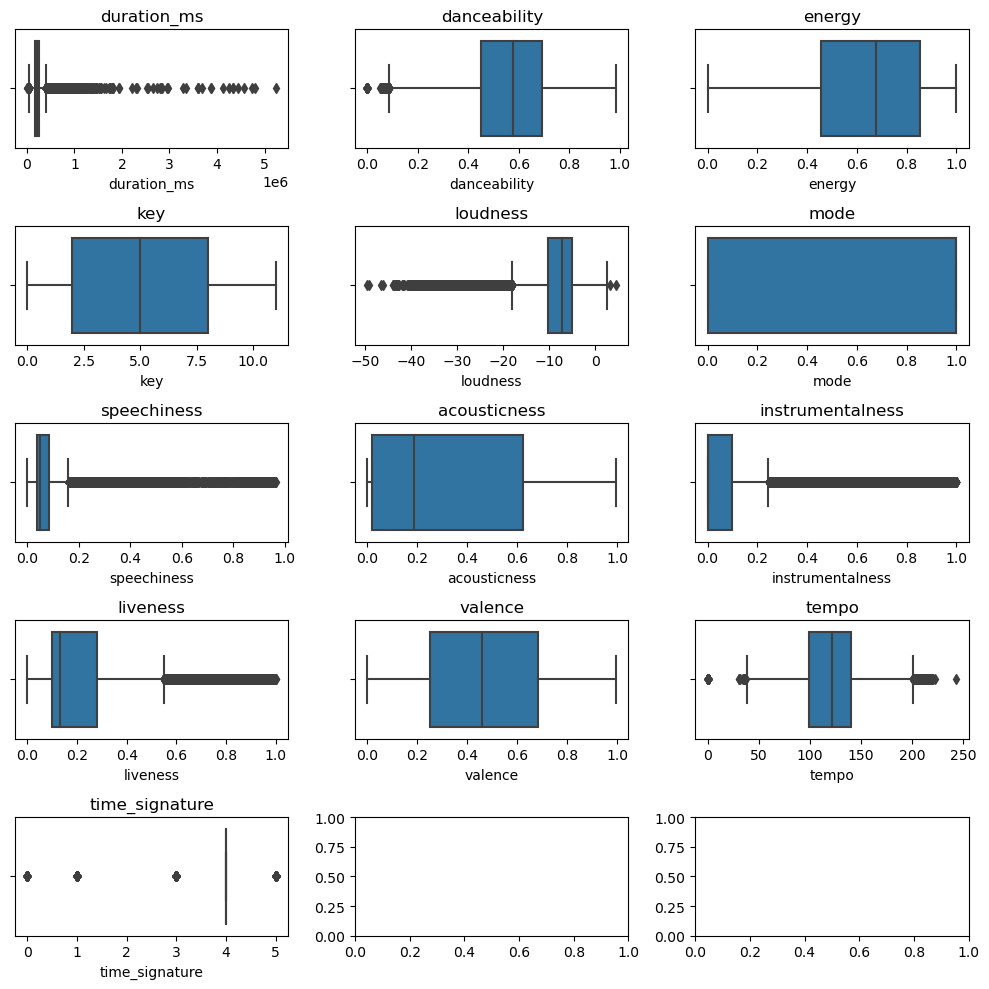

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))  # Create a grid of subplots with 5 rows and 3 cols
columns_of_interest = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
                       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                       'valence', 'tempo', 'time_signature']

for i, column in enumerate(columns_of_interest):
    row = i // 3
    col = i % 3
    sns.boxplot(x=spotify_data[column], ax=axes[row, col])
    axes[row, col].set_title(column)  # Create a boxplot for each column in the list

plt.tight_layout()
plt.show()

Some variables seem to have outliers, but this could not be a problem for the performance of a *ridge regression* if I standardize them. 

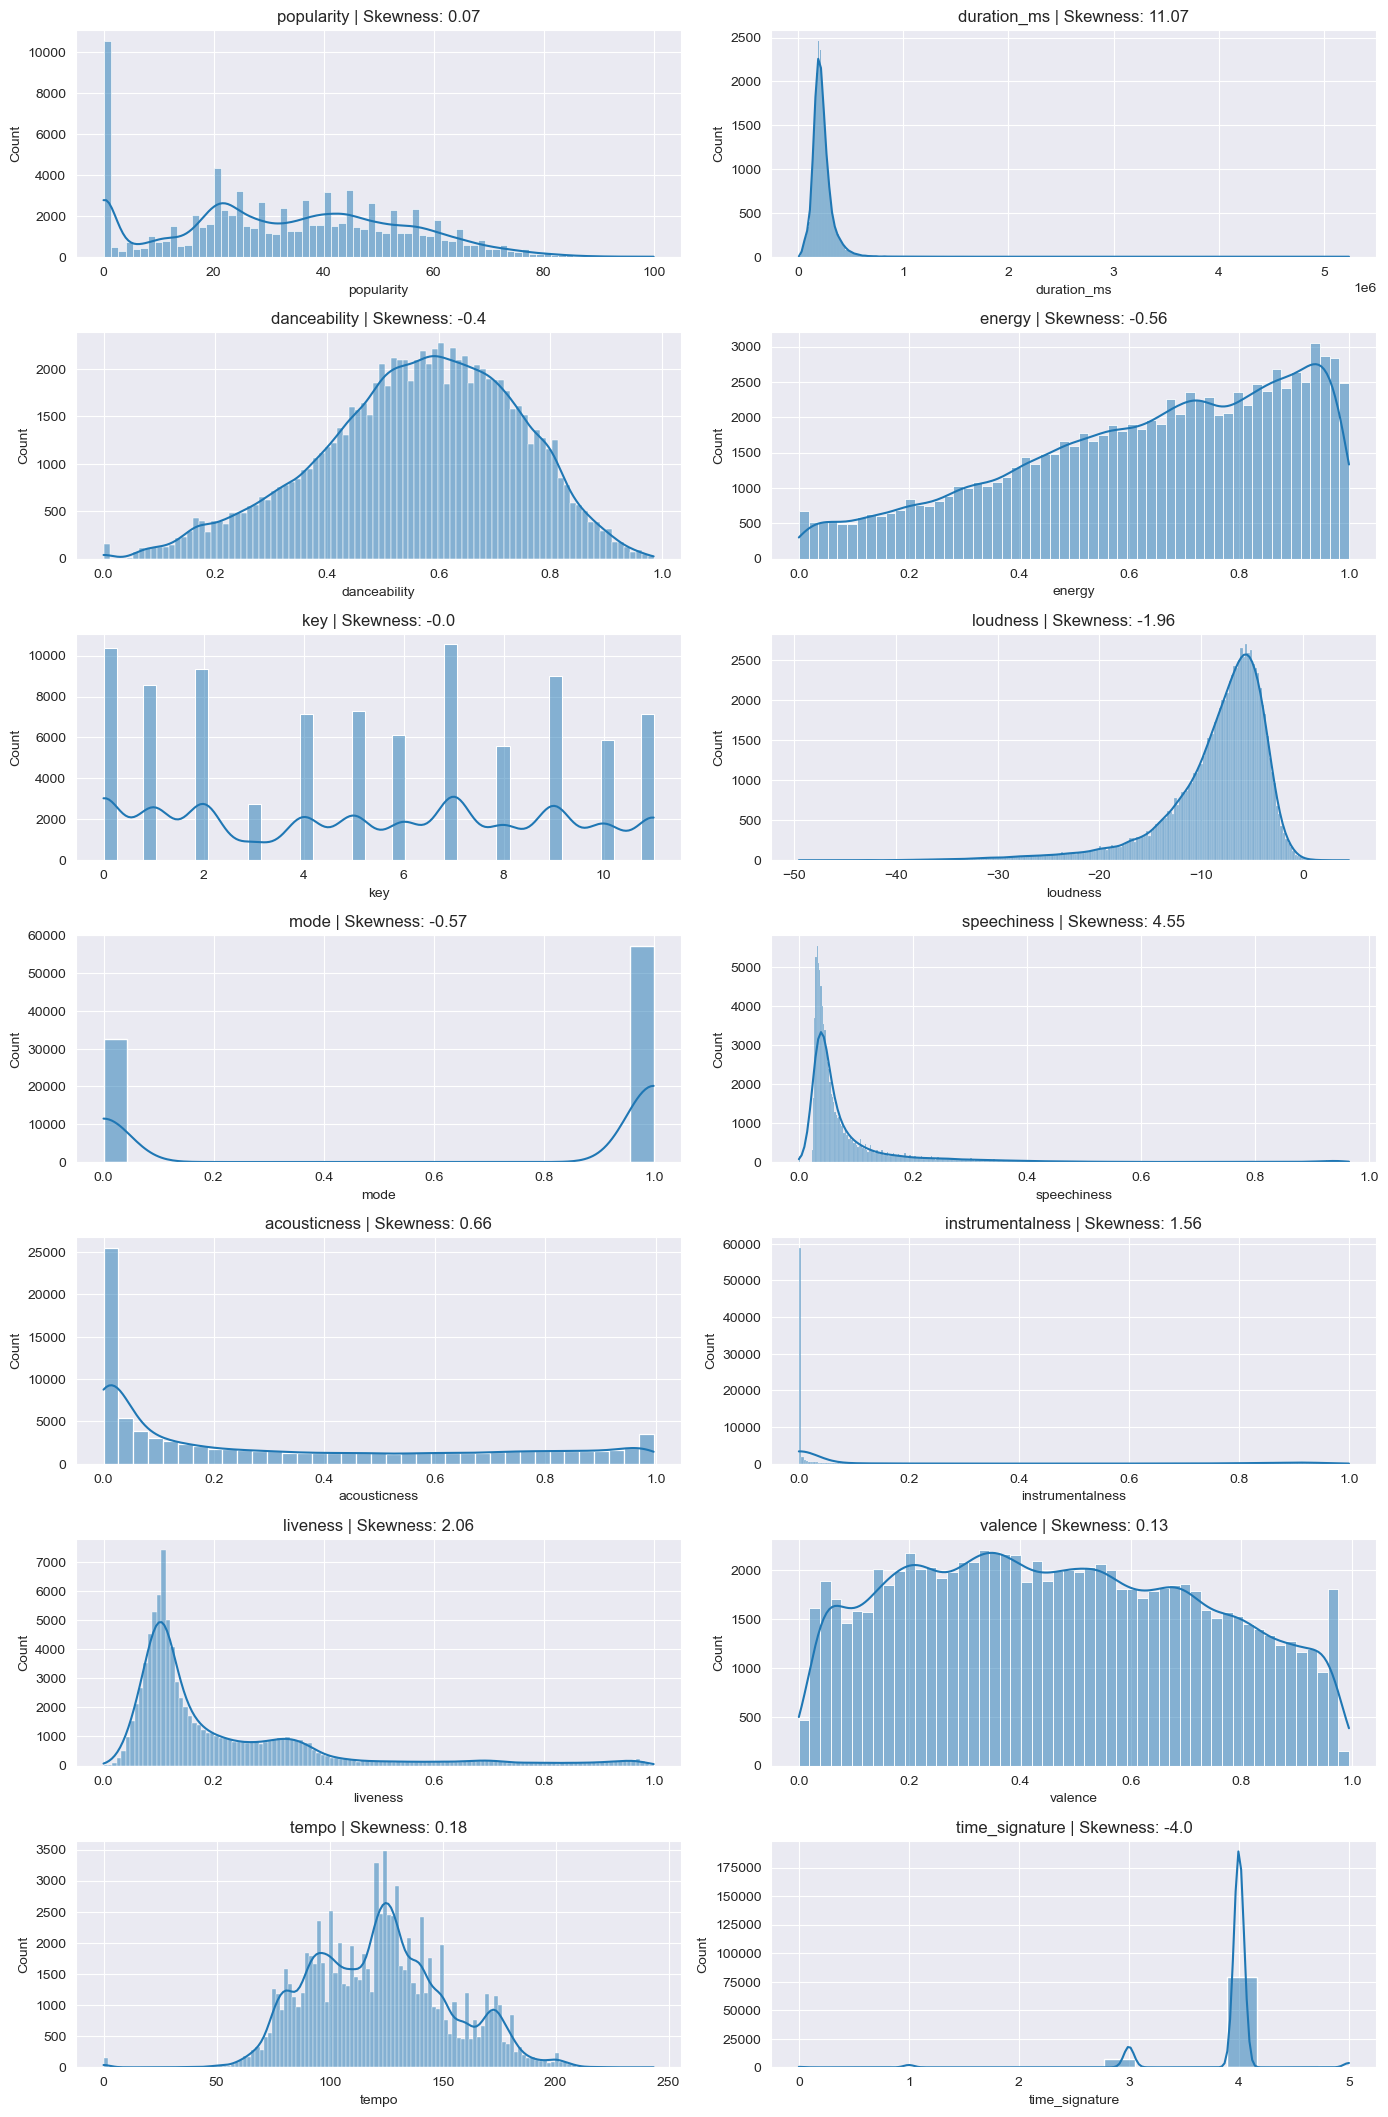

In [17]:
sns.set_style("darkgrid")
 
numerical_columns = spotify_data.select_dtypes(include=["int64", "float64"]).columns
 
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(spotify_data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(spotify_data[feature].skew(), 2)}") # Create a skewness plot for each column
    
plt.tight_layout()
plt.show()

The **skewness** of some variables is high in absolute value. For the same reason stated before, this might not be a big issue.

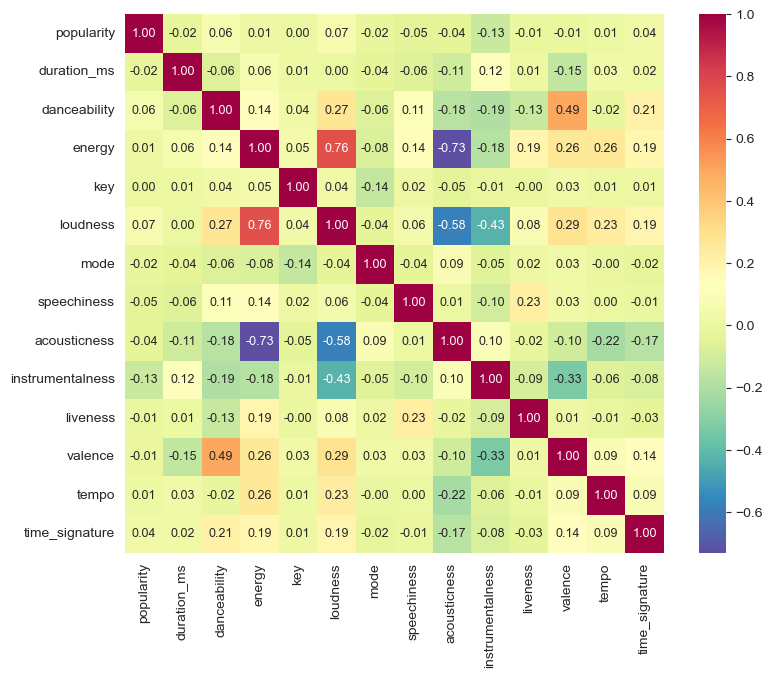

In [18]:
cat_col = ['artists', 'album_name', 'track_name', 'explicit', 'all_genres']
corrmat = spotify_data.drop(columns=cat_col).corr()  # Create a correlation matrix
fig, ax = plt.subplots(figsize=(9, 7))
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 9}, 
                 yticklabels=spotify_data.drop(columns=cat_col).columns, 
                 xticklabels=spotify_data.drop(columns=cat_col).columns, 
                 cmap="Spectral_r") # Some parameters for heatmap() function
plt.show()

Finally, I've checked for *multicollinearity* problems, but the variables don't seem to be high correlated. The only exceptions are the negative relationship between **'acousticness'** and **'energy'** and the positive relationship between **'energy'** and **'loudness'**, but it's quite reasonable.

## 1.1) Categorical Features Encoding

First of all, I apply **one-hot encoding** for the **'all_genres'** column, since there are few unique values.

In [19]:
# One-hot encoding for genres

encoded_genres = spotify_data['all_genres'].str.get_dummies(sep=',') # Create a dataset with one-hot encoded columns
spotify_data_encoded = spotify_data.copy()
spotify_data_encoded = pd.concat([spotify_data, encoded_genres], axis=1) # Concatenate the two datasets

I can drop **'all_genres'** column, which is useless.

In [20]:
spotify_data_encoded.drop(columns='all_genres', inplace=True)

In [21]:
spotify_data_encoded

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0,0,0,0,0,0,0,0,0,0
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,0,0,0,0,0,0,0,0,0,0
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0,0,0,0,0,0,0,0,0,0
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0,0,0,0,0,0,0,0,0,0
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,...,0,0,0,0,0,0,0,0,0,1
89736,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,...,0,0,0,0,0,0,0,0,0,1
89737,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,...,0,0,0,0,0,0,0,0,0,1
89738,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,...,0,0,0,0,0,0,0,0,0,1


So, I have now a **89740** rows x **244** cols matrix as dataset.

Then I simply convert **'explicit'**, which is boolean, in integer (*0* = False, *1* = True).

In [22]:
spotify_data_encoded['explicit'] = spotify_data_encoded['explicit'].astype(int)  # Convert 'explicit' in numerical

Finally, I apply **Target** encoding for the remaining categorical features; otherwise, the matrix would become too large. At the end I'll try different types of encoding.

In [23]:
# Target encoding for 'artists', 'album_name', 'track_name'

target_encoder = ce.TargetEncoder(cols=['artists', 'album_name', 'track_name'])
spotify_data_target = target_encoder.fit_transform(spotify_data_encoded, spotify_data_encoded['popularity'])

In [24]:
spotify_data_target.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,37.133580,38.377280,38.377280,73,230666,0,0.676,0.4610,1,-6.746,...,0,0,0,0,0,0,0,0,0,0
1,35.202574,36.035328,35.369298,55,149610,0,0.420,0.1660,1,-17.235,...,0,0,0,0,0,0,0,0,0,0
2,36.295544,36.295544,36.295544,57,210826,0,0.438,0.3590,0,-9.734,...,0,0,0,0,0,0,0,0,0,0
3,41.026934,38.117063,37.650208,71,201933,0,0.266,0.0596,0,-18.515,...,0,0,0,0,0,0,0,0,0,0
4,35.663965,34.346377,37.319713,82,198853,0,0.618,0.4430,2,-9.681,...,0,0,0,0,0,0,0,0,0,0


## 1.2) Standardization and Dataset Splitting

Before implementing the algorithm I'm going to standardize ($ \frac{X_i-\mu}{\sigma} $) the numerical variables and split the dataset.

In [25]:
num_features = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                'valence', 'tempo', 'time_signature']

scaler = StandardScaler()
spotify_data_target[num_features] = scaler.fit_transform(spotify_data_target[num_features]) # Standardization

In [26]:
spotify_data_target.describe(include='float64').T.round(3)

,count,mean,std,min,25%,50%,75%,max
artists,89740.0,32.507,7.913,0.995,29.806,33.100,35.952,67.888
album_name,89740.0,31.659,7.186,0.165,30.983,33.211,35.515,62.268
track_name,89740.0,32.909,3.665,2.642,31.482,33.271,35.125,41.890
duration_ms,89740.0,-0.000,1.000,-1.953,-0.497,-0.140,0.311,44.341
danceability,89740.0,-0.000,1.000,-3.182,-0.635,0.078,0.735,2.393
energy,89740.0,-0.000,1.000,-2.473,-0.692,0.162,0.852,1.425
key,89740.0,0.000,1.000,-1.484,-0.922,-0.080,0.763,1.606
loudness,89740.0,0.000,1.000,-7.858,-0.349,0.252,0.649,2.496
mode,89740.0,-0.000,1.000,-1.325,-1.325,0.755,0.755,0.755
speechiness,89740.0,0.000,1.000,-0.772,-0.454,-0.340,-0.014,7.747


The numerical features of the encoded dataset have now mean $ \bar{x_i} $ = 0 and sd $ \sigma $ = 1.

In [27]:
# Split the encoded dataset in train and test set

X_train, X_test, y_train, y_test = train_test_split(spotify_data_target.drop('popularity', axis=1),
                                                    spotify_data_target['popularity'],
                                                    test_size=0.2, # 80% training, 20% test
                                                    random_state=0) # Random seed for reproducibility

In [28]:
# Create a subset of X_train and X_test with only numerical variables

X_train_num = X_train[num_features]
X_test_num = X_test[num_features]

According to the random_state the two **training sets** should have the same observations. Let's check this.

In [29]:
X_train

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
87183,38.805368,38.443486,35.514894,0.616951,0,-0.232985,1.003650,1.324891,0.305276,-1.324621,...,0,0,0,0,0,0,0,1,0,0
58622,27.028690,32.001965,32.001965,-0.323443,0,-0.651795,-0.625313,1.043984,-0.837502,0.754933,...,0,0,0,0,0,0,0,0,0,0
54259,33.982295,36.685870,36.685870,0.213215,0,0.332975,1.034826,1.605799,0.995309,0.754933,...,0,0,0,0,0,0,0,0,0,0
78899,57.227387,39.917726,37.076195,-0.273977,0,-0.380134,-1.545015,-1.203275,-0.483963,0.754933,...,0,0,0,0,0,0,0,0,0,0
17724,30.884595,30.884595,31.481531,-0.351183,1,-0.063197,0.886739,-0.360553,0.624342,-1.324621,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,31.880888,31.893947,32.001965,0.737549,0,-0.906477,0.890636,-1.203275,0.262376,0.754933,...,0,0,0,0,0,0,0,0,0,0
45891,36.425653,36.425653,36.425653,0.107660,0,0.553699,1.136149,1.605799,0.966581,-1.324621,...,0,0,0,0,0,0,0,0,0,0
42613,33.432085,33.528518,34.343917,-1.242031,0,-0.204687,0.707475,0.201262,0.120463,-1.324621,...,0,0,0,0,0,0,0,0,0,0
43567,32.132073,32.132073,32.132073,-0.306329,0,0.536720,1.307619,-1.484183,1.025185,0.754933,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_train_num

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
87183,0.616951,-0.232985,1.003650,1.324891,0.305276,-1.324621,0.243277,-0.898812,1.567357,-0.771081,-0.648532,1.394236,0.226216
58622,-0.323443,-0.651795,-0.625313,1.043984,-0.837502,0.754933,-0.465605,1.884954,-0.509670,-0.507847,0.831332,-0.920533,-1.979174
54259,0.213215,0.332975,1.034826,1.605799,0.995309,0.754933,-0.237845,-0.958608,-0.535485,-0.709505,1.322083,0.329140,0.226216
78899,-0.273977,-0.380134,-1.545015,-1.203275,-0.483963,0.754933,-0.507096,1.861307,-0.499048,-0.664350,-0.427884,1.789654,0.226216
17724,-0.351183,-0.063197,0.886739,-0.360553,0.624342,-1.324621,6.210946,1.409071,-0.535485,3.422701,0.507968,-1.362004,0.226216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0.737549,-0.906477,0.890636,-1.203275,0.262376,0.754933,-0.028623,-0.970191,1.771157,0.287499,-0.336581,-0.369557,0.226216
45891,0.107660,0.553699,1.136149,1.605799,0.966581,-1.324621,-0.510627,-0.690133,-0.535485,0.159217,0.994916,-0.400470,0.226216
42613,-1.242031,-0.204687,0.707475,0.201262,0.120463,-1.324621,2.971102,-0.246173,-0.535445,0.554325,0.606879,-0.712614,-1.979174
43567,-0.306329,0.536720,1.307619,-1.484183,1.025185,0.754933,-0.187525,-0.919207,-0.535473,0.703131,0.519381,0.927430,0.226216


# <font color ='red'> 2) Ridge Regression from Scratch </font>

Now I'm going to create a class to implement Ridge regression from scratch. The class has:
- a **fit** method, which is the core of the algorithm. It computes the coefficients (weights) estimate;
- a **predict** method to test the model on different observations;
- a **mse** method to compute the Mean Squared Error;
- a **r_squared** method to compute the $R^2$;
- a **cross_validation** method to compute the risk estimate and find the best alpha value.

In [31]:
class RidgeRegression:
    """
    Ridge Regression model implementation with methods for fitting, predicting,
    and evaluating the model using mean squared error (MSE), R-squared, and
    cross-validation.
    """

    def __init__(self, alpha=1.0):
        """
        Initialize RidgeRegression object with a regularization parameter alpha.

        Args:
        - alpha: Regularization parameter (default is 1.0).
        """
        self.alpha = alpha
        self.weights_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fit the Ridge Regression model to the given data.

        Args:
        - X: Features matrix.
        - y: Target values.
        
        Returns:
        - An array-like with the coefficients estimate.

        This method computes the coefficients of the Ridge Regression model
        using the closed-form solution.
        """
        y = y.values.reshape(-1, 1)  # Ensure y is a column vector
        self.intercept_ = np.ones((X.shape[0], 1))  # Compute intercept with 1 on each row
        Xi = np.c_[self.intercept_, X]  # Add column of ones for intercept to the X matrix
        XTX = Xi.T @ Xi  # Compute X^T*X
        XTy = Xi.T @ y  # Compute X^T*y
        I = np.identity(Xi.shape[1])  # Identity matrix
        I[0][0] = 0  # Set first element to 0 to avoid regularization for intercept
        self.weights_ = np.linalg.inv(XTX + self.alpha * I) @ XTy  # Compute weights
        return self.weights_

    def predict(self, X):
        """
        Make predictions using the fitted Ridge Regression model.

        Args:
        - X: Feature matrix for prediction.

        Returns:
        - An array-like with predicted target values.

        This method computes predictions using the learned coefficients.
        """
        intercept = np.ones((X.shape[0], 1))
        X = np.c_[intercept, X]  # Add column of ones for intercept to X matrix
        return (X @ self.weights_).reshape(-1)

    def mse(self, predictions, targets):
        """
        Compute the mean squared error (MSE) between predictions and targets.

        Args:
        - predictions: Predicted values.
        - targets: True target values.

        Returns:
        - Mean squared error.

        This method computes the MSE between predicted and true target values.
        """
        predictions = predictions.reshape(-1)
        targets = targets.values.reshape(-1) if isinstance(targets, pd.DataFrame) or isinstance(targets, pd.Series) else targets.reshape(-1)
        return np.mean((predictions - targets) ** 2)  # Compute MSE = (∑(ŷ_i - y_i)^2)/n

    def r_squared(self, predictions, targets):
        """
        Compute the R-squared coefficient of determination.

        Args:
        - predictions: predicted values.
        - targets: true target values.

        Returns:
        - R-squared value.

        This method computes the R-squared coefficient of determination.
        """
        targets = targets.values.reshape(-1) if isinstance(targets, pd.DataFrame) or isinstance(targets, pd.Series) else targets.reshape(-1)
        predictions = predictions.reshape(-1)
        RSS = np.sum((targets - predictions) ** 2) # Compute the Residual Sum of Squares
        TSS = np.sum((targets - np.mean(targets)) ** 2) # Compute the Total Sum of Squares
        return 1 - (RSS / TSS)


    def cross_validation(self, X, y, alpha_values, n_splits=5):
            """
            Perform k-fold cross-validation to estimate model performance
            for different alpha values.

            Args:
            - X: Feature matrix.
            - y: Target values.
            - alpha_values: List or array of alpha values to test.
            - n_splits: Number of folds for cross-validation (default is 5).

            Returns:
            - Dictionary containing alpha values as keys and average MSE across all folds as values.

            This method computes the average mean squared error (MSE) using k-fold
            cross-validation for each alpha value.
            """
            alpha_cv_mse = {}  # A dictionary to store alpha and corresponding mses
            kf = KFold(n_splits=n_splits)
            for alpha in alpha_values:
                cv_mse = []  # A list to store mses for current alpha
                for train_index, test_index in kf.split(X):
                    # Extract training and test data for the current fold
                    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
                    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

                    # Train the model on the training data
                    self.alpha = alpha  # Set current alpha value
                    self.fit(X_train_fold, y_train_fold)

                    # Make predictions on the test data
                    y_pred_fold = self.predict(X_test_fold)

                    # Calculate the error (MSE) between predictions and target values
                    fold_mse = self.mse(y_pred_fold, y_test_fold)
                    cv_mse.append(fold_mse)

                # Compute the mean of the cross-validated mses for current alpha
                average_cv_mse = np.mean(cv_mse)
                alpha_cv_mse[alpha] = average_cv_mse

            return alpha_cv_mse

# <font color ='red'> 3) Ridge Regression on Numerical Dataset </font>

Now I'll test the model on just the **numerical dataset**. Firstly I train and test the model with the default value of **alpha = 1.0**, according to the class created above, then I'll tune the parameter later on.

In [32]:
ridge_num = RidgeRegression()  # Default alpha value = 1.0
ridge_num.fit(X_train_num, y_train)  # Fit the model on training set

array([[33.14233285],
       [-0.5432411 ],
       [ 1.70471202],
       [-0.64388868],
       [ 0.04530529],
       [ 0.45607267],
       [-0.39978723],
       [-1.37373867],
       [-0.51231169],
       [-2.87006218],
       [ 0.09047267],
       [-2.19495472],
       [ 0.19245805],
       [ 0.38173612]])

In [33]:
predictions_train_num = ridge_num.predict(X_train_num) # Make predictions on training set
predictions_test_num = ridge_num.predict(X_test_num) # Make predictions on test set 

In [34]:
mse_train_num = ridge_num.mse(predictions_train_num, y_train) # Compute training mean squared error
mse_test_num = ridge_num.mse(predictions_test_num, y_test) # Compute test mean squared error

In [35]:
print(f'Training MSE: {mse_train_num}') 
print(f'Test MSE: {mse_test_num}')

Training MSE: 408.0631341662972
Test MSE: 418.9764046176226


In [36]:
rsquared_train_num = ridge_num.r_squared(predictions_train_num, y_train) # Compute training R^2 
rsquared_test_num = ridge_num.r_squared(predictions_test_num, y_test) # Compute test R^2

In [37]:
print(f'Training R^2: {rsquared_train_num}') 
print(f'Test R^2: {rsquared_test_num}')

Training R^2: 0.031268193516515774
Test R^2: 0.03189878279213476


## 3.1) Alpha Tuning on Numerical Dataset

Here I'll try to compute the errors and the accuracy with different values of the **parameter alpha**.

In [38]:
alphas = 10**np.linspace(10, -2, 100)*0.5  # A list of possible alpha values from 10^10 to 10^-2 scaled by 0.5

train_errors_num = []
test_errors_num = []    # Lists for storing errors (MSE)
train_rsquared_num = []
test_rsquared_num = []  # Lists for storing r_squareds
 
# For each alpha value fit the model and compute the mean squared error (MSE) and R^2
for alpha in alphas:
    model = RidgeRegression(alpha=alpha)
    model.fit(X_train_num, y_train)
    
    # Compute training MSE and R^2
    train_pred = model.predict(X_train_num)
    train_mse = model.mse(train_pred, y_train)
    train_R_2_num = model.r_squared(train_pred, y_train)
    train_errors_num.append(train_mse)
    train_rsquared_num.append(train_R_2_num)
    
    # Compute test MSE and R^2
    test_pred = model.predict(X_test_num)
    test_mse = model.mse(test_pred, y_test)
    test_R_2_num = model.r_squared(test_pred, y_test)
    test_errors_num.append(test_mse)
    test_rsquared_num.append(test_R_2_num)

In [39]:
# Searching the best alpha

idx_min_num = np.argmin(test_errors_num) 
best_alpha_num = alphas[idx_min_num]
print(f'The best alpha value for the Numerical dataset is {best_alpha_num} with a test MSE = {min(test_errors_num)} and a Test R^2 = {max(test_rsquared_num)}')

The best alpha value for the Numerical dataset is 0.005 with a test MSE = 418.9764017780363 and a Test R^2 = 0.0318987893533802


### 3.1.1) Numerical Dataset Plots

I'll plot two **graphs**, that show how the MSE and R^2 vary based on the different alpha values tested.

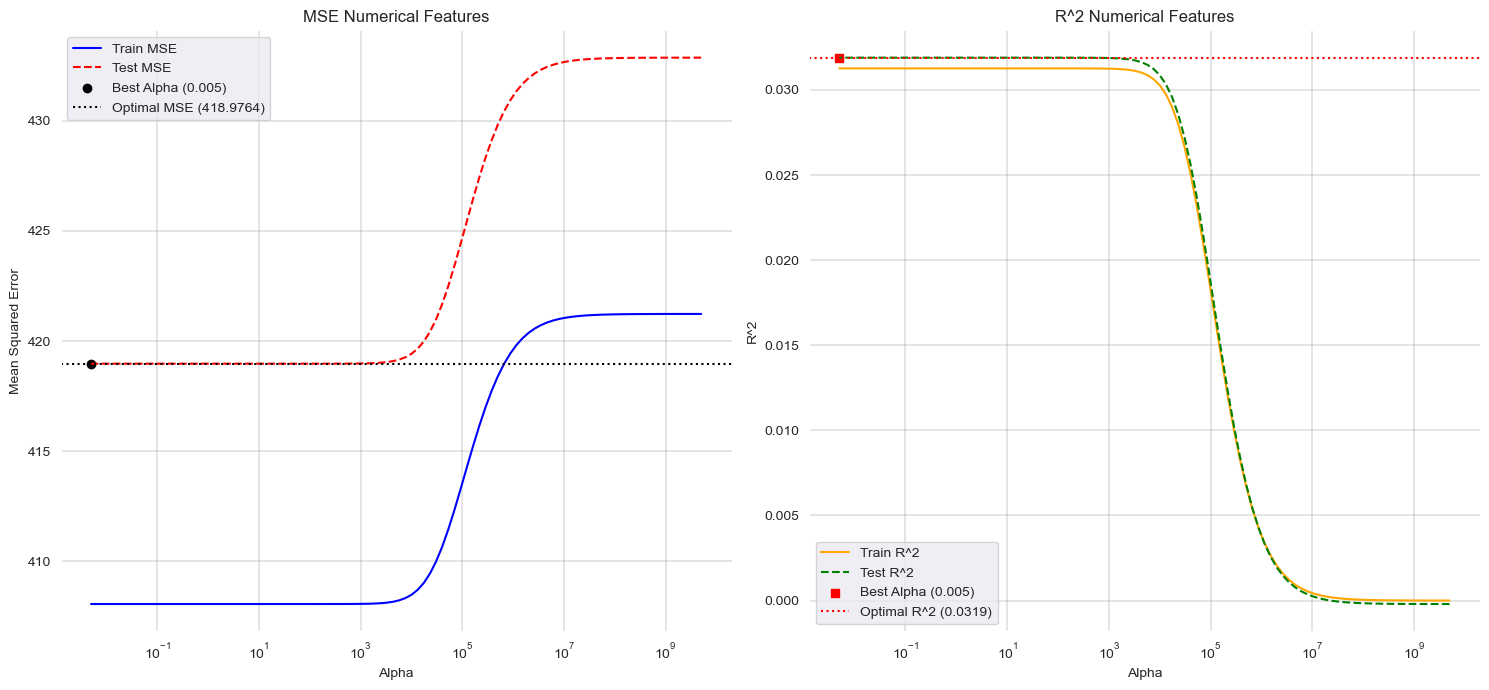

In [40]:
# Create figure and axes for both MSE and R^2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Set a white background
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Plot MSE
ax1.plot(alphas, train_errors_num, label='Train MSE', color='blue', linestyle='-')
ax1.plot(alphas, test_errors_num, label='Test MSE', color='red', linestyle='--')
ax1.scatter(best_alpha_num, min(test_errors_num), color='black', label=f'Best Alpha ({best_alpha_num})', marker='o')
ax1.axhline(y=min(test_errors_num), color='black', linestyle=':', label=f'Optimal MSE ({min(test_errors_num):.4f})')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('MSE Numerical Features')
ax1.set_xscale('log')  # Set log scale for better visualization of alpha values
ax1.legend()
ax1.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Plot R^2
ax2.plot(alphas, train_rsquared_num, label='Train R^2', color='orange', linestyle='-')
ax2.plot(alphas, test_rsquared_num, label='Test R^2', color='green', linestyle='--')
ax2.scatter(best_alpha_num, max(test_rsquared_num), color='red', label=f'Best Alpha ({best_alpha_num})', marker='s')
ax2.axhline(y=max(test_rsquared_num), color='red', linestyle=':', label=f'Optimal R^2 ({max(test_rsquared_num):.4f})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R^2')
ax2.set_title('R^2 Numerical Features')
ax2.set_xscale('log')  
ax2.legend()
ax2.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## 3.2) 5-Fold CV on Numerical Dataset

Finally, I'll compute **5-fold CV risk estimate** for each alpha value. This allow me to find the best risk with the possible alpha among those tested (alphas list created before).

In [41]:
# Initialize RidgeRegression with the default alpha value
ridge_cv_num = RidgeRegression()

# Perform k-fold cross-validation
alpha_cv_results_num = ridge_cv_num.cross_validation(X_train_num, y_train, alphas)

cv_best_alpha_num = min(alpha_cv_results_num, key=alpha_cv_results_num.get)
cv_best_mse_num = alpha_cv_results_num[cv_best_alpha_num]

print("Best CV alpha value for Numerical dataset:", cv_best_alpha_num)
print("Corresponding average MSE:", cv_best_mse_num)

Best CV alpha value for Numerical dataset: 201.85086292982749
Corresponding average MSE: 408.1988341572359


# <font color ='red'> 4) Ridge Regression on Target Encoded Dataset </font>

Now I'll repeat all the previous steps on the **target encoded dataset**.

In [42]:
ridge = RidgeRegression()
ridge.fit(X_train, y_train)  

array([[-7.68480413e+01],
       [ 1.64052860e-01],
       [ 1.52715440e+00],
       [ 1.72845262e+00],
       [-6.06053035e-01],
       [ 1.03001966e-01],
       [-6.85414029e-02],
       [-5.47820970e-01],
       [-3.27291776e-04],
       [ 4.30790180e-01],
       [ 7.75944473e-02],
       [-5.50838385e-01],
       [ 1.51322373e-01],
       [-3.65710756e-01],
       [-2.25984113e-01],
       [ 1.52827709e-01],
       [-4.51727600e-02],
       [ 2.89628899e-02],
       [-2.69316892e+00],
       [ 5.74741742e+00],
       [-2.17523894e+00],
       [-2.98943100e-01],
       [ 6.84138856e+00],
       [-5.57237764e-01],
       [-1.13368259e+00],
       [-1.62241772e+00],
       [-1.15270487e+00],
       [-1.73441206e+00],
       [-1.57258197e+00],
       [ 0.00000000e+00],
       [ 9.83152852e-01],
       [-1.57005092e+00],
       [ 1.33351415e+00],
       [ 8.71232136e-01],
       [-4.23875915e+00],
       [-7.36253773e-01],
       [-6.08120065e+00],
       [-4.94830041e+00],
       [ 6.5

In [43]:
predictions_train = ridge.predict(X_train) 
predictions_test = ridge.predict(X_test) 

In [44]:
mse_train = ridge.mse(predictions_train, y_train) 
mse_test = ridge.mse(predictions_test, y_test) 

In [45]:
print(f'Training MSE: {mse_train}') 
print(f'Test MSE: {mse_test}')

Training MSE: 80.46369923576475
Test MSE: 84.01557512862854


In [46]:
rsquared_train = ridge.r_squared(predictions_train, y_train) 
rsquared_test = ridge.r_squared(predictions_test, y_test) 

In [47]:
print(f'Training R^2: {rsquared_train}') 
print(f'Test R^2: {rsquared_test}')

Training R^2: 0.8089811644556937
Test R^2: 0.8058707372300004


## 4.1) Alpha Tuning on Target Encoded Dataset

In [48]:
# alphas = 10**np.linspace(10, -2, 100)*0.5 --> the same alphas values as before

train_errors = []
test_errors = []
train_rsquared = []
test_rsquared = []

for alpha in alphas:
    model = RidgeRegression(alpha=alpha)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    train_mse = model.mse(train_pred, y_train)
    train_R_2 = model.r_squared(train_pred, y_train)
    train_errors.append(train_mse)
    train_rsquared.append(train_R_2)
    
    test_pred = model.predict(X_test)
    test_mse = model.mse(test_pred, y_test)
    test_R_2 = model.r_squared(test_pred, y_test)
    test_errors.append(test_mse)
    test_rsquared.append(test_R_2)

In [49]:
# Searching the best alpha

idx_min = np.argmin(test_errors)
best_alpha = alphas[idx_min]
print(f'The best alpha value for the Target encoded dataset is {best_alpha} with a test MSE = {min(test_errors)} and test R^2 = {max(test_rsquared)}')

The best alpha value for the Target encoded dataset is 1.7555958671075638 with a test MSE = 84.01183526484253 and test R^2 = 0.8058793786872365


### 4.1.1) Target Encoded Dataset Plots

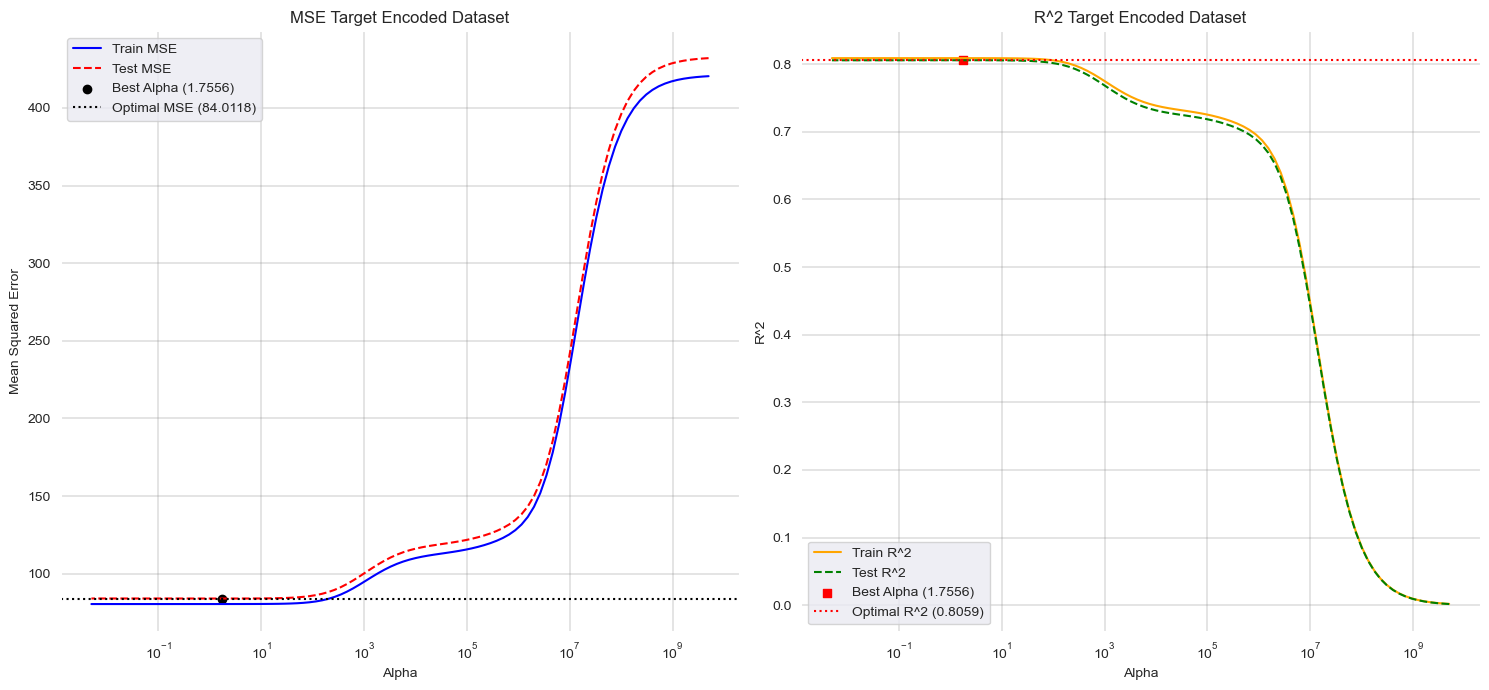

In [50]:
# Create figure and axes for both MSE and R^2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Set a white background
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Plot MSE
ax1.plot(alphas, train_errors, label='Train MSE', color='blue', linestyle='-')
ax1.plot(alphas, test_errors, label='Test MSE', color='red', linestyle='--')
ax1.scatter(best_alpha, min(test_errors), color='black', label=f'Best Alpha ({best_alpha:.4f})', marker='o')
ax1.axhline(y=min(test_errors), color='black', linestyle=':', label=f'Optimal MSE ({min(test_errors):.4f})')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('MSE Target Encoded Dataset')
ax1.set_xscale('log')  
ax1.legend()
ax1.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Plot R^2
ax2.plot(alphas, train_rsquared, label='Train R^2', color='orange', linestyle='-')
ax2.plot(alphas, test_rsquared, label='Test R^2', color='green', linestyle='--')
ax2.scatter(best_alpha, max(test_rsquared), color='red', label=f'Best Alpha ({best_alpha:.4f})', marker='s')
ax2.axhline(y=max(test_rsquared), color='red', linestyle=':', label=f'Optimal R^2 ({max(test_rsquared):.4f})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R^2')
ax2.set_title('R^2 Target Encoded Dataset')
ax2.set_xscale('log')  
ax2.legend()
ax2.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## 4.2) 5-Fold CV on Target Encoded Dataset

In [51]:
ridge_cv_target = RidgeRegression()

alpha_cv_results_target = ridge_cv_target.cross_validation(X_train, y_train, alphas)

cv_best_alpha_target = min(alpha_cv_results_target, key=alpha_cv_results_target.get)
cv_best_mse_target = alpha_cv_results_target[cv_best_alpha_target]

print("Best CV alpha value for Target encoded dataset:", cv_best_alpha_target)
print("Corresponding average MSE:", cv_best_mse_target)

Best CV alpha value for Target encoded dataset: 7.087370814634009
Corresponding average MSE: 81.24037164691757


# <font color ='red'> 5) Ridge Regression with Different Encoding Techniques </font>

Now I'll try to test the performance of the model with different encoding techniques: **Catboost** and **Leave-One-Out**, which are both similar to target encoding. 

## 5.1) Catboost Encoding

Catboost is similar to Target encoding but takes into account the order of the categories. It's based on the average of the target variable for observations with the same category value, but with a regularization that prevents overfitting. It was created specifically for the CatBoost machine learning algorithm and is particularly useful for decision trees; however I'll still try to test the Ridge Regression model.

In [52]:
# CatBoost Encoding for 'artists', 'album_name', 'track_name'
catboost_encoder = ce.CatBoostEncoder(cols=['artists', 'album_name', 'track_name'])

spotify_data_catboost = catboost_encoder.fit_transform(spotify_data_encoded, spotify_data_encoded['popularity'])

In [53]:
spotify_data_catboost[num_features] = scaler.fit_transform(spotify_data_catboost[num_features]) # Standardization

In [54]:
spotify_data_catboost

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,33.198808,33.198808,33.198808,73,0.013472,0,0.644253,-0.675975,-1.203275,0.335727,...,0,0,0,0,0,0,0,0,0,0
1,33.198808,33.198808,33.198808,55,-0.704186,0,-0.804604,-1.825602,-1.203275,-1.673087,...,0,0,0,0,0,0,0,0,0,0
2,33.198808,33.198808,33.198808,57,-0.162188,0,-0.702731,-1.073473,-1.484183,-0.236524,...,0,0,0,0,0,0,0,0,0,0
3,33.198808,33.198808,33.198808,71,-0.240925,0,-1.676182,-2.240247,-1.484183,-1.918228,...,0,0,0,0,0,0,0,0,0,0
4,33.198808,33.198808,33.198808,82,-0.268195,0,0.315996,-0.746122,-0.922368,-0.226373,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,28.066269,28.066269,33.198808,21,1.379914,0,-2.208184,-1.556706,-0.079646,-1.511831,...,0,0,0,0,0,0,0,0,0,1
89736,26.299702,26.299702,33.198808,22,1.379923,0,-2.196865,-2.016557,-1.484183,-1.880499,...,0,0,0,0,0,0,0,0,0,1
89737,27.630678,25.008284,33.198808,22,0.374710,0,0.378251,-1.190384,-1.484183,-0.458874,...,0,0,0,0,0,0,0,0,0,1
89738,35.435672,43.099404,29.266567,41,0.484736,0,0.140548,-0.500608,0.482169,-0.457725,...,0,0,0,0,0,0,0,0,0,1


As expected the three encoded variables have now different values.

In [55]:
# Splitting the dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(spotify_data_catboost.drop('popularity', axis=1),
                                                        spotify_data_catboost['popularity'],
                                                        test_size=0.2,
                                                        random_state=0) # The same random seed 

### 5.1.1) Model Implementation

In [56]:
catboost_ridge = RidgeRegression()  
catboost_ridge.fit(X_train1, y_train1)  

array([[-6.34034773e+00],
       [ 1.92837477e-01],
       [ 9.49247487e-01],
       [ 1.31129459e-01],
       [-4.57757231e-01],
       [ 8.06329907e-01],
       [ 3.86080771e-01],
       [-5.04594238e-01],
       [ 1.55415844e-02],
       [ 1.64459047e-01],
       [-1.27507665e-01],
       [-3.94148256e-01],
       [-1.06473261e-01],
       [-3.22209047e-01],
       [-4.70691436e-01],
       [-3.31854162e-01],
       [-1.08082948e-02],
       [ 1.20099916e-01],
       [-5.34966314e+00],
       [ 2.42695169e+01],
       [-7.25598202e+00],
       [-1.89106752e+00],
       [ 7.84964824e+00],
       [-2.88380185e-01],
       [ 9.17777623e-01],
       [-9.96128946e-01],
       [ 6.27899204e-01],
       [-3.10497924e+00],
       [ 9.04117522e-03],
       [ 0.00000000e+00],
       [ 1.63260919e+00],
       [-5.76027771e-01],
       [ 3.33200716e-01],
       [-8.48044402e+00],
       [ 5.19880997e-01],
       [ 7.81422182e-01],
       [-1.27015582e+01],
       [-1.15142308e+01],
       [-2.6

In [57]:
cat_train_pred = catboost_ridge.predict(X_train1) 
cat_test_pred = catboost_ridge.predict(X_test1)  

In [58]:
cat_mse_train = catboost_ridge.mse(cat_train_pred, y_train1) 
cat_mse_test = catboost_ridge.mse(cat_test_pred, y_test1) 

In [59]:
print(f'Training MSE: {cat_mse_train}') 
print(f'Test MSE: {cat_mse_test}')

Training MSE: 143.82454837486384
Test MSE: 149.6050277290662


In [60]:
cat_rsquared_train = catboost_ridge.r_squared(cat_train_pred, y_train1) 
cat_rsquared_test = catboost_ridge.r_squared(cat_test_pred, y_test1) 

In [61]:
print(f'Training R^2: {cat_rsquared_train}') 
print(f'Test R^2: {cat_rsquared_test}')

Training R^2: 0.6585640728155725
Test R^2: 0.6543175036859019


### 5.1.2) Alpha Tuning

In [62]:
# alphas = 10**np.linspace(10, -2, 100)*0.5 --> the same alphas values 

cat_train_errors = []
cat_test_errors = []
cat_train_rsquared = []
cat_test_rsquared = []

for alpha in alphas:
    model = RidgeRegression(alpha=alpha)
    model.fit(X_train1, y_train1)
    
    cat_train_pred = model.predict(X_train1)
    cat_train_mse = model.mse(cat_train_pred, y_train1)
    cat_train_R_2 = model.r_squared(cat_train_pred, y_train1)
    cat_train_errors.append(cat_train_mse)
    cat_train_rsquared.append(cat_train_R_2)
    
    cat_test_pred = model.predict(X_test1)
    cat_test_mse = model.mse(cat_test_pred, y_test1)
    cat_test_R_2 = model.r_squared(cat_test_pred, y_test1)
    cat_test_errors.append(cat_test_mse)
    cat_test_rsquared.append(cat_test_R_2)

In [63]:
# Searching the best alpha

cat_idx_min = np.argmin(cat_test_errors)
cat_best_alpha = alphas[cat_idx_min]
print(f'The best alpha value for the Catboost encoded dataset is {cat_best_alpha} with a test MSE = {min(cat_test_errors)} and test R^2 = {max(cat_test_rsquared)}')

The best alpha value for the Catboost encoded dataset is 4.055654153948428 with a test MSE = 149.5728884012379 and test R^2 = 0.6543917659165381


### 5.1.3) Plots

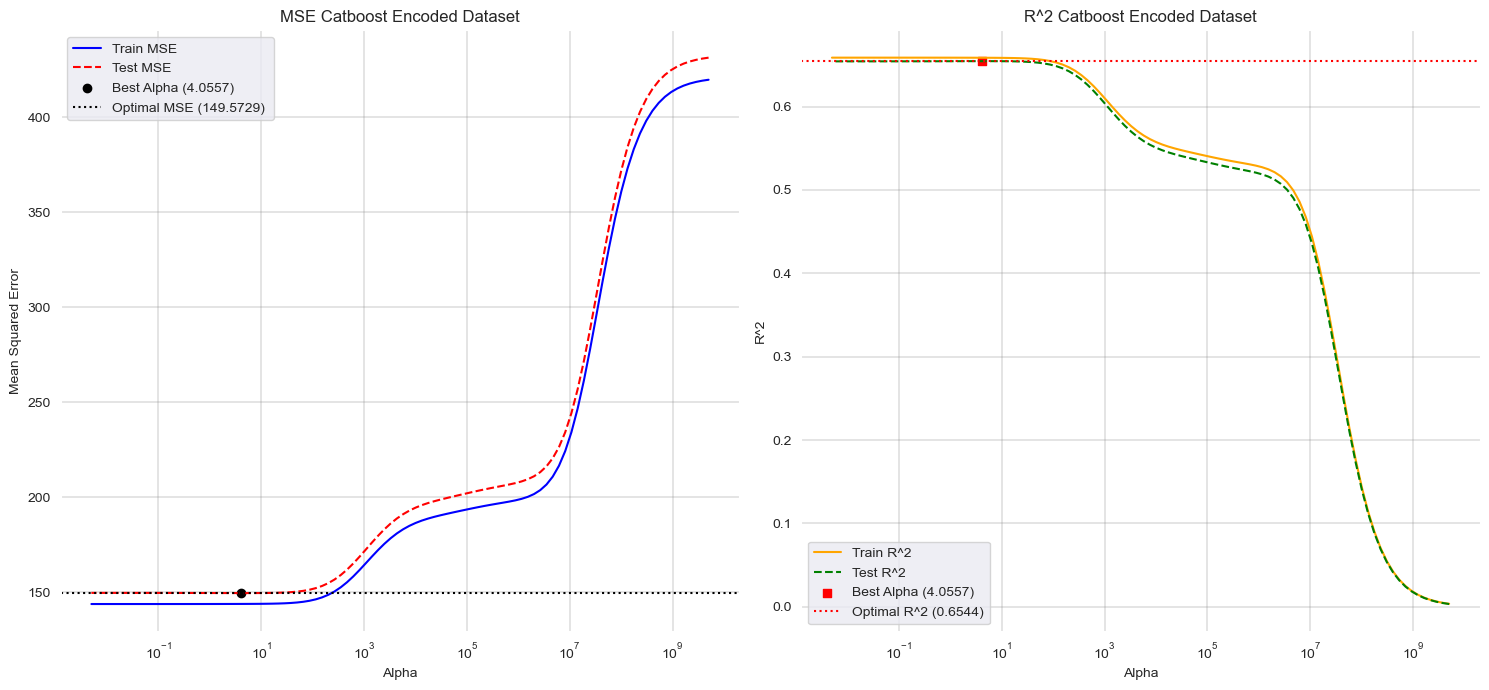

In [64]:
# Create figure and axes for both MSE and R^2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Set a white background
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Plot MSE
ax1.plot(alphas, cat_train_errors, label='Train MSE', color='blue', linestyle='-')
ax1.plot(alphas, cat_test_errors, label='Test MSE', color='red', linestyle='--')
ax1.scatter(cat_best_alpha, min(cat_test_errors), color='black', label=f'Best Alpha ({cat_best_alpha:.4f})', marker='o')
ax1.axhline(y=min(cat_test_errors), color='black', linestyle=':', label=f'Optimal MSE ({min(cat_test_errors):.4f}) ')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('MSE Catboost Encoded Dataset')
ax1.set_xscale('log')  
ax1.legend()
ax1.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Plot R^2
ax2.plot(alphas, cat_train_rsquared, label='Train R^2', color='orange', linestyle='-')
ax2.plot(alphas, cat_test_rsquared, label='Test R^2', color='green', linestyle='--')
ax2.scatter(cat_best_alpha, max(cat_test_rsquared), color='red', label=f'Best Alpha ({cat_best_alpha:.4f})', marker='s')
ax2.axhline(y=max(cat_test_rsquared), color='red', linestyle=':', label=f'Optimal R^2 ({max(cat_test_rsquared):.4f})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R^2')
ax2.set_title('R^2 Catboost Encoded Dataset')
ax2.set_xscale('log')  
ax2.legend()
ax2.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### 5.1.4) 5-Fold CV

In [65]:
ridge_cv_catboost = RidgeRegression()

alpha_cv_results_catboost = ridge_cv_catboost.cross_validation(X_train1, y_train1, alphas)

cv_best_alpha_catboost = min(alpha_cv_results_catboost, key=alpha_cv_results_catboost.get)
cv_best_mse_catboost = alpha_cv_results_catboost[cv_best_alpha_catboost]

print("Best CV alpha value for Catboost encoded dataset:", cv_best_alpha_catboost)
print("Corresponding average MSE:", cv_best_mse_catboost)

Best CV alpha value for Catboost encoded dataset: 7.087370814634009
Corresponding average MSE: 145.03797176608137


## 5.2) Leave-One-Out Encoding

Leave-one-out is also similar to Target encoding, but it replaces each level with the mean of the target variable for all observations except the current one.

In [66]:
# Leave-one-out Encoding for 'artists', 'album_name', 'track_name'
loo_encoder = ce.LeaveOneOutEncoder(cols=['artists', 'album_name', 'track_name'])

spotify_data_loo = loo_encoder.fit_transform(spotify_data_encoded, spotify_data_encoded['popularity'])

In [67]:
spotify_data_loo

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,48.000000,33.198808,33.198808,73,230666,0,0.676,0.4610,1,-6.746,...,0,0,0,0,0,0,0,0,0,0
1,39.500000,33.198808,42.000000,55,149610,0,0.420,0.1660,1,-17.235,...,0,0,0,0,0,0,0,0,0,0
2,33.198808,33.198808,33.198808,57,210826,0,0.438,0.3590,0,-9.734,...,0,0,0,0,0,0,0,0,0,0
3,52.714286,33.198808,54.250000,71,201933,0,0.266,0.0596,0,-18.515,...,0,0,0,0,0,0,0,0,0,0
4,37.700000,30.400000,40.437500,82,198853,0,0.618,0.4430,2,-9.681,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,24.333333,24.333333,33.198808,21,384999,0,0.172,0.2350,5,-16.393,...,0,0,0,0,0,0,0,0,0,1
89736,24.000000,24.000000,33.198808,22,385000,0,0.174,0.1170,0,-18.318,...,0,0,0,0,0,0,0,0,0,1
89737,26.769231,24.652174,33.198808,22,271466,0,0.629,0.3290,0,-10.895,...,0,0,0,0,0,0,0,0,0,1
89738,35.518519,53.000000,28.909091,41,283893,0,0.587,0.5060,7,-10.889,...,0,0,0,0,0,0,0,0,0,1


Once again we have different values for the three variables.

In [68]:
spotify_data_loo[num_features] = scaler.fit_transform(spotify_data_loo[num_features]) # Standardization

In [69]:
# Splitting the dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(spotify_data_loo.drop('popularity', axis=1),
                                                        spotify_data_loo['popularity'],
                                                        test_size=0.2,
                                                        random_state=0) # The same random seed 

### 5.2.1) Model Implementation

In [70]:
loo_ridge = RidgeRegression()  
loo_ridge.fit(X_train2, y_train2)  

array([[ 1.47476770e+00],
       [ 2.57417050e-01],
       [ 7.21519053e-01],
       [ 5.54447652e-02],
       [-4.06588684e-01],
       [ 7.54218814e-01],
       [ 3.50721391e-01],
       [-3.13167957e-01],
       [ 2.09362194e-02],
       [-1.16511177e-01],
       [-6.96047274e-02],
       [-2.39243131e-01],
       [-8.73287568e-02],
       [-2.39853537e-01],
       [-3.07754449e-01],
       [-1.48953186e-01],
       [ 3.34336632e-02],
       [ 1.24493530e-01],
       [-7.07406784e+00],
       [ 6.79476642e+00],
       [-3.77726857e+00],
       [-1.37985792e+00],
       [ 8.64815905e+00],
       [-3.98093468e+00],
       [ 7.46932045e-01],
       [-1.46631779e-01],
       [ 2.01402186e+00],
       [-8.41898871e+00],
       [ 1.29569129e-02],
       [ 0.00000000e+00],
       [ 4.40353633e-01],
       [-6.50149814e-01],
       [-5.90492857e-01],
       [-4.85465316e+00],
       [-3.14631520e+00],
       [ 2.02423909e+00],
       [-1.00633046e+01],
       [-3.43848575e+00],
       [-2.8

In [71]:
loo_train_pred = loo_ridge.predict(X_train2) 
loo_test_pred = loo_ridge.predict(X_test2)  

In [72]:
loo_mse_train = loo_ridge.mse(loo_train_pred, y_train2) 
loo_mse_test = loo_ridge.mse(loo_test_pred, y_test2) 

In [73]:
print(f'Training MSE: {loo_mse_train}') 
print(f'Test MSE: {loo_mse_test}')

Training MSE: 121.87324151872066
Test MSE: 127.66526427743604


In [74]:
loo_rsquared_train = loo_ridge.r_squared(loo_train_pred, y_train2) 
loo_rsquared_test = loo_ridge.r_squared(loo_test_pred, y_test2) 

In [75]:
print(f'Training R^2: {loo_rsquared_train}') 
print(f'Test R^2: {loo_rsquared_test}')

Training R^2: 0.7106759333708532
Test R^2: 0.7050122718606404


### 5.2.2) Alpha Tuning

In [76]:
loo_train_errors = []
loo_test_errors = []
loo_train_rsquared = []
loo_test_rsquared = []

for alpha in alphas:
    model = RidgeRegression(alpha=alpha)
    model.fit(X_train2, y_train2)
    
    loo_train_pred = model.predict(X_train2)
    loo_train_mse = model.mse(loo_train_pred, y_train2)
    loo_train_R_2 = model.r_squared(loo_train_pred, y_train2)
    loo_train_errors.append(loo_train_mse)
    loo_train_rsquared.append(loo_train_R_2)
    
    loo_test_pred = model.predict(X_test2)
    loo_test_mse = model.mse(loo_test_pred, y_test2)
    loo_test_R_2 = model.r_squared(loo_test_pred, y_test2)
    loo_test_errors.append(loo_test_mse)
    loo_test_rsquared.append(loo_test_R_2)

In [77]:
# Searching the best alpha

loo_idx_min = np.argmin(loo_test_errors)
loo_best_alpha = alphas[loo_idx_min]
print(f'The best alpha value for the Leave-One-Out encoded dataset is {loo_best_alpha} with a test MSE = {min(loo_test_errors)} and test R^2 = {max(loo_test_rsquared)}')

The best alpha value for the Leave-One-Out encoded dataset is 5.361336110051605 with a test MSE = 127.63418470924191 and test R^2 = 0.7050840853744025


### 5.2.3) Plots

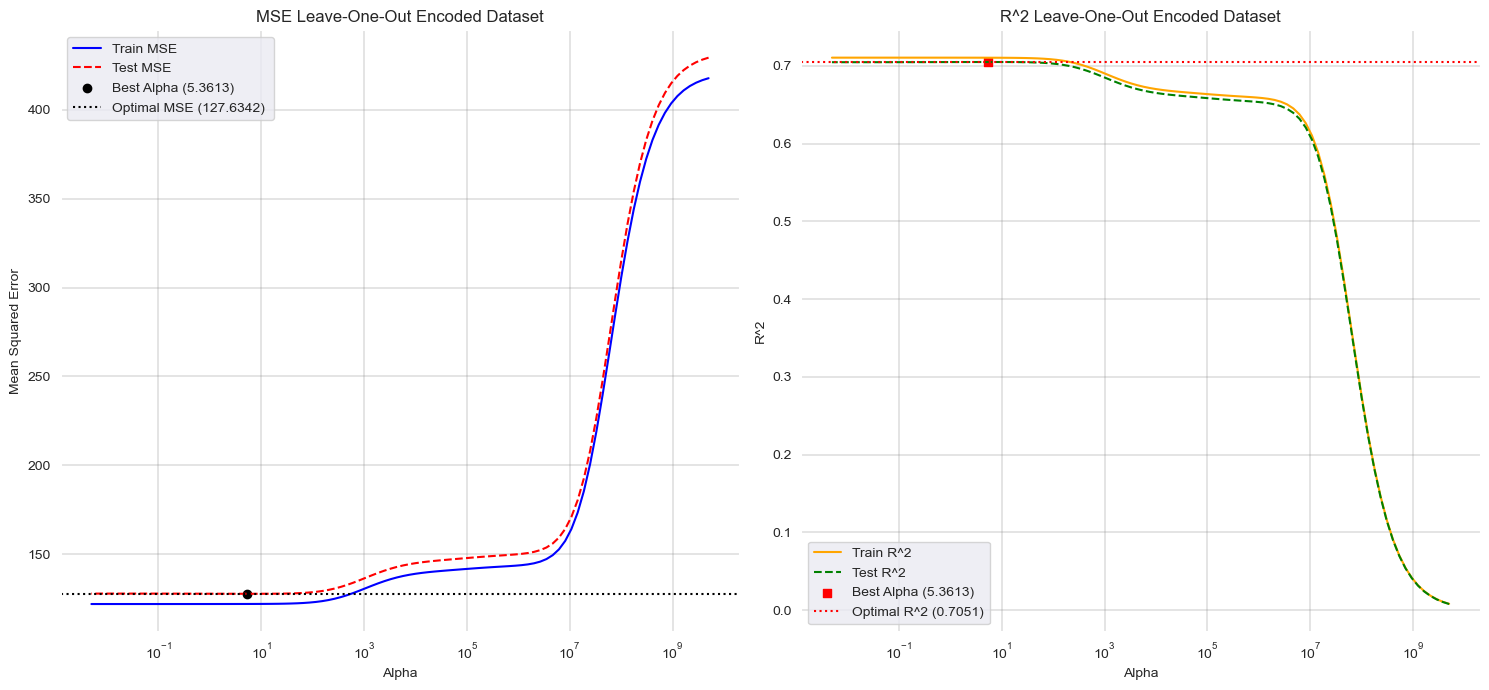

In [78]:
# Create figure and axes for both MSE and R^2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Set a white background
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Plot MSE
ax1.plot(alphas, loo_train_errors, label='Train MSE', color='blue', linestyle='-')
ax1.plot(alphas, loo_test_errors, label='Test MSE', color='red', linestyle='--')
ax1.scatter(loo_best_alpha, min(loo_test_errors), color='black', label=f'Best Alpha ({loo_best_alpha:.4f})', marker='o')
ax1.axhline(y=min(loo_test_errors), color='black', linestyle=':', label=f'Optimal MSE ({min(loo_test_errors):.4f}) ')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('MSE Leave-One-Out Encoded Dataset')
ax1.set_xscale('log')  
ax1.legend()
ax1.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Plot R^2
ax2.plot(alphas, loo_train_rsquared, label='Train R^2', color='orange', linestyle='-')
ax2.plot(alphas, loo_test_rsquared, label='Test R^2', color='green', linestyle='--')
ax2.scatter(loo_best_alpha, max(loo_test_rsquared), color='red', label=f'Best Alpha ({loo_best_alpha:.4f})', marker='s')
ax2.axhline(y=max(loo_test_rsquared), color='red', linestyle=':', label=f'Optimal R^2 ({max(loo_test_rsquared):.4f})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R^2')
ax2.set_title('R^2 Leave-One-Out Encoded Dataset')
ax2.set_xscale('log')  
ax2.legend()
ax2.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### 5.2.4) 5-Fold CV

In [79]:
ridge_cv_loo = RidgeRegression()

alpha_cv_results_loo = ridge_cv_loo.cross_validation(X_train2, y_train2, alphas)

cv_best_alpha_loo = min(alpha_cv_results_loo, key=alpha_cv_results_loo.get)
cv_best_mse_loo = alpha_cv_results_loo[cv_best_alpha_loo]

print("Best CV alpha value for Leave-One-Out encoded dataset:", cv_best_alpha_loo)
print("Corresponding average MSE:", cv_best_mse_loo)

Best CV alpha value for Leave-One-Out encoded dataset: 9.369087114301934
Corresponding average MSE: 122.72950942541017


# <font color ='red'> 6) Conclusions </font>

In conclusion I'll plot some graphs to show the different **performances** of the implemented models.

## 6.1) Training and Test MSE Comparison

The plot below shows the difference between the **training and test MSE** for each implemented model: Numerical dataset, Target, Catboost and Leave-One-Out encoding. Here I consider the min MSE computed by tuning the alpha values manually (without CV).

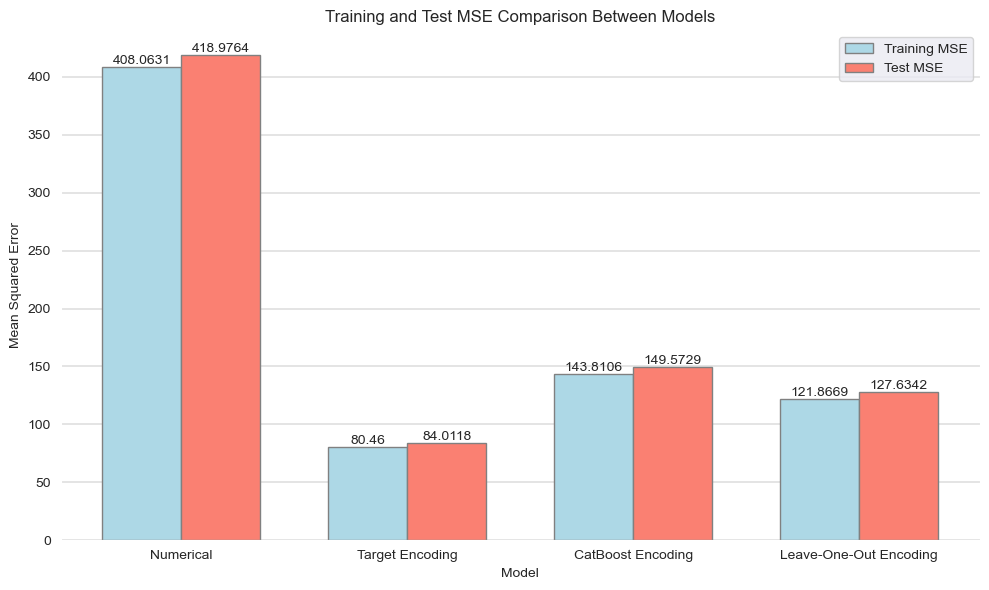

In [80]:
models = ['Numerical', 'Target Encoding', 'CatBoost Encoding', 'Leave-One-Out Encoding']
training_mses = [min(train_errors_num), min(train_errors), min(cat_train_errors), min(loo_train_errors)]
test_mses = [min(test_errors_num), min(test_errors), min(cat_test_errors), min(loo_test_errors)]

# Set the bar width
bar_width = 0.35

# Define bar positions
bar_1 = range(len(models))
bar_2 = [bar + bar_width for bar in bar_1]

# Histogram plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(bar_1, training_mses, color='lightblue', width=bar_width, edgecolor='grey', label='Training MSE')
bars2 = plt.bar(bar_2, test_mses, color='salmon', width=bar_width, edgecolor='grey', label='Test MSE')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test MSE Comparison Between Models')
plt.xticks([bar + bar_width / 2 for bar in range(len(models))], models)
plt.legend(loc='upper right')
plt.gca().set_facecolor('white')
plt.grid(visible=True, color='grey', linestyle='-', linewidth=0.3, axis='y')

# Add labels above the bars
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), va='bottom', ha='center') 

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()

## 6.2) Training and Test $ R^2 $ Comparison

This plot, instead, shows the difference between the **training and test $ R^2 $** for each implemented model. Again, I consider the max $ R^2 $ computed by tuning the alpha values without CV.

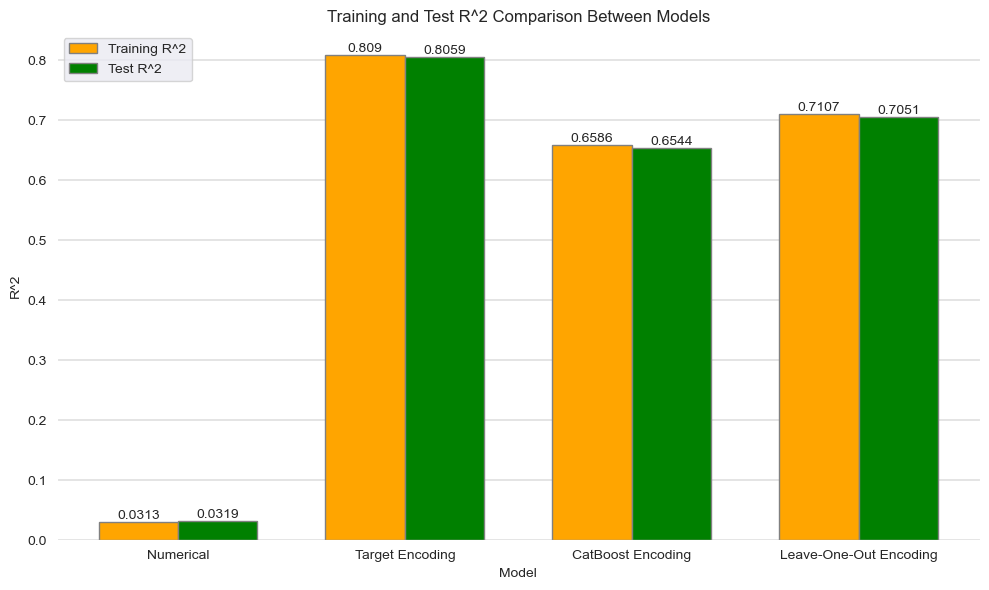

In [81]:
training_r_squared = [max(train_rsquared_num), max(train_rsquared), max(cat_train_rsquared), max(loo_train_rsquared)]
test_r_squared = [max(test_rsquared_num), max(test_rsquared), max(cat_test_rsquared), max(loo_test_rsquared)]

# Histogram plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(bar_1, training_r_squared, color='orange', width=bar_width, edgecolor='grey', label='Training R^2')
bars2 = plt.bar(bar_2, test_r_squared, color='green', width=bar_width, edgecolor='grey', label='Test R^2')
plt.xlabel('Model')
plt.ylabel('R^2')
plt.title('Training and Test R^2 Comparison Between Models')
plt.xticks([bar + bar_width / 2 for bar in range(len(models))], models)
plt.legend(loc='upper left')
plt.gca().set_facecolor('white')
plt.grid(visible=True, color='grey', linestyle='-', linewidth=0.3, axis='y')

# Add labels above the bars
add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()

## 6.3) 5-Fold CV Scores Comparison

Finally, this plot shows the difference between the **5-fold CV scores** for each implemented model.

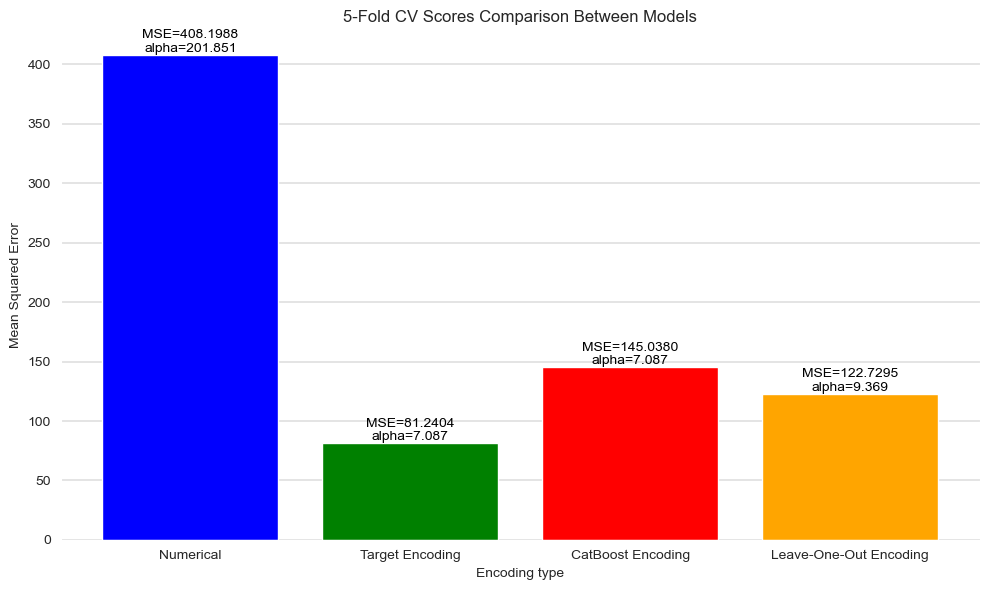

In [82]:
# models = ['Numerical', 'Target Encoding', 'CatBoost Encoding', 'Leave-One-Out Encoding']
cv_scores = [cv_best_mse_num, cv_best_mse_target, cv_best_mse_catboost, cv_best_mse_loo]
alphas = [cv_best_alpha_num, cv_best_alpha_target, cv_best_alpha_catboost, cv_best_alpha_loo]

# Histogram plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, cv_scores, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Encoding type')
plt.ylabel('Mean Squared Error')
plt.title('5-Fold CV Scores Comparison Between Models')

# Add MSE and alpha labels on each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'MSE={cv_scores[i]:.4f}\nalpha={alphas[i]:.3f}', 
             ha='center', va='bottom', color='black', fontsize=10)
    

plt.gca().set_facecolor('white')
plt.grid(visible=True, color='grey', linestyle='-', linewidth=0.3, axis='y') 
plt.tight_layout()
plt.show()